<a href="https://colab.research.google.com/github/zaraaa12/Machine_Learning/blob/main/ClusteringStuntingBalita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/DataBalitaStunting.csv')

# Penggabungan nama kecamatan
df['kecamatan'] = df['kemendagri_nama_kecamatan'].fillna(df['bps_nama_kecamatan'])
df.drop(['bps_nama_kecamatan', 'kemendagri_nama_kecamatan'], axis=1, inplace=True)

df.head()

,id,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,jumlah_balita_stunting,satuan,tahun,kecamatan
0,1,32,JAWA BARAT,3202,KABUPATEN\n SUKABUMI,3202010,3202010001,CIBENDA,32.02.22,32.02.22.2002,CIBENDA,6,ANAK,2023,CIEMAS
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,3202010,3202010002,CIWARU,32.02.22,32.02.22.2003,CIWARU,22,ANAK,2023,CIEMAS
2,3,32,JAWA BARAT,3202,KABUPATEN\n SUKABUMI,3202010,3202010003,TAMANJAYA,32.02.22,32.02.22.2006,TAMANJAYA,7,ANAK,2023,CIEMAS
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,3202010,3202010004,MEKARJAYA,32.02.22,32.02.22.2004,MEKARJAYA,3,ANAK,2023,CIEMAS
4,5,32,JAWA BARAT,3202,KABUPATEN\n SUKABUMI,3202010,3202010005,CIEMAS,32.02.22,32.02.22.2001,CIEMAS,7,ANAK,2023,CIEMAS


In [ ]:
df.columns              # Mengembalikan list nama-nama kolom

Index(['id', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kabupaten_kota',
       'bps_nama_kabupaten_kota', 'bps_kode_kecamatan',
       'bps_kode_desa_kelurahan', 'bps_nama_desa_kelurahan',
       'kemendagri_kode_kecamatan', 'kemendagri_kode_desa_kelurahan',
       'kemendagri_nama_desa_kelurahan', 'jumlah_balita_stunting', 'satuan',
       'tahun', 'kecamatan'],
      dtype='object')

In [ ]:
# 3. Data Cleaning
cols_drop = ['nama_provinsi', 'bps_nama_kabupaten_kota',
             'bps_nama_desa_kelurahan', 'kemendagri_nama_desa_kelurahan',
             'satuan', 'Filter']
for col in cols_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# Hapus baris yang memiliki nilai kosong
df = df.dropna(subset=['kecamatan', 'jumlah_balita_stunting', 'tahun'])

# Ubah tipe data kolom numerik
df['jumlah_balita_stunting'] = pd.to_numeric(df['jumlah_balita_stunting'], errors='coerce')
df['tahun'] = pd.to_numeric(df['tahun'], errors='coerce')

# Hapus baris hasil konversi yang gagal
df = df.dropna(subset=['jumlah_balita_stunting', 'tahun']).reset_index(drop=True)
print(df[['kecamatan', 'jumlah_balita_stunting', 'tahun']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   kecamatan               355 non-null    object 
 1   jumlah_balita_stunting  355 non-null    float64
 2   tahun                   355 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 8.4+ KB
None


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 4. Encoding nama kecamatan dan tahun
le_kecamatan = LabelEncoder()
df['kecamatan_enc'] = le_kecamatan.fit_transform(df['kecamatan'])

In [ ]:
from sklearn.preprocessing import StandardScaler

# 5. Normalisasi fitur numerik
scaler = StandardScaler()
features = ['jumlah_balita_stunting', 'tahun', 'kecamatan_enc']
X = scaler.fit_transform(df[features])

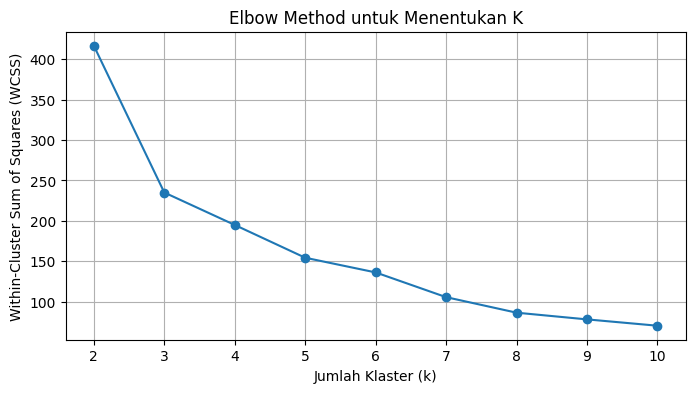

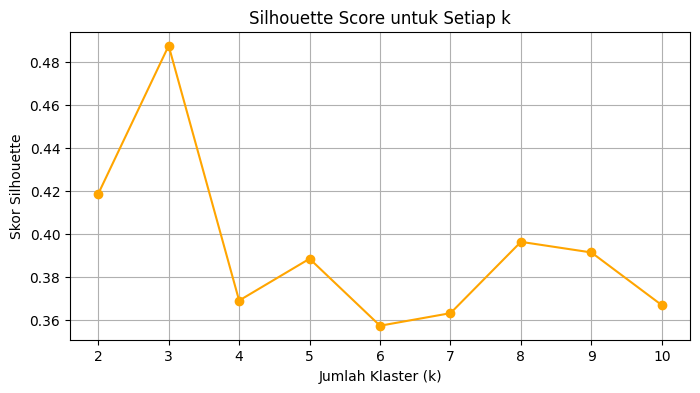

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette = []
range_n_clusters = range(2, 11)  # 2 sampai 10

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    sil_score = silhouette_score(X, labels)
    silhouette.append(sil_score)

# Plot Elbow: WCSS vs K
plt.figure(figsize=(8,4))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method untuk Menentukan K')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Plot Silhouette Score vs K
plt.figure(figsize=(8,4))
plt.plot(range_n_clusters, silhouette, marker='o', color='orange')
plt.title('Silhouette Score untuk Setiap k')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Skor Silhouette')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [ ]:
# 7. Jalankan K-Means dengan jumlah klaster optimal
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X)
df['cluster'] = df['cluster'] + 1  # Ubah ke 1,2,3
centers = scaler.inverse_transform(kmeans.cluster_centers_)

print(df['cluster'].value_counts().sort_index())

cluster
1    178
2    133
3     44
Name: count, dtype: int64


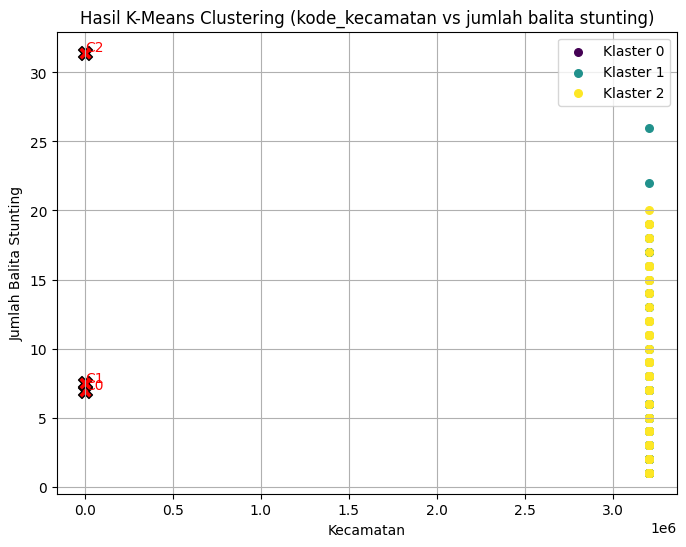

In [ ]:
import matplotlib.cm as cm

# 8. Visualisasi scatter (Kecamatan vs Jumlah Balita Stunting)
plt.figure(figsize=(8,6))
colors = cm.viridis(np.linspace(0, 1, k_optimal))
for i, color in enumerate(colors):
    subset = df[df['cluster'] == i]
    plt.scatter(subset['bps_kode_kecamatan'], subset['jumlah_balita_stunting'],
                s=30, c=[color], label=f'Klaster {i}')

centers = scaler.inverse_transform(kmeans.cluster_centers_)
for idx, center in enumerate(centers):
    plt.scatter(center[1], center[0], c='red', marker='X', s=100, edgecolor='k')
    plt.text(center[1]+0.1, center[0]+0.1, f'C{idx}', color='red')

plt.title('Hasil K-Means Clustering (kode_kecamatan vs jumlah balita stunting)')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Balita Stunting')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 9. Interpretasi hasil klaster: statistik per klaster
cluster_summary = df.groupby('cluster').agg(
    count=('jumlah_balita_stunting','count'),
    avg_stunting=('jumlah_balita_stunting','mean'),
    avg_year=('tahun','mean')
).round(2)
print(cluster_summary)

         count  avg_stunting  avg_year
cluster                               
1          178          6.94    2023.0
2          133          7.47    2023.0
3           44         31.43    2023.0


In [ ]:
print(df.columns.tolist())

['id', 'kode_provinsi', 'bps_kode_kabupaten_kota', 'bps_kode_kecamatan', 'bps_kode_desa_kelurahan', 'kemendagri_kode_kecamatan', 'kemendagri_kode_desa_kelurahan', 'jumlah_balita_stunting', 'tahun', 'kecamatan', 'kecamatan_enc', 'cluster']


In [ ]:
df_selected = df[['bps_kode_kecamatan', 'jumlah_balita_stunting', 'tahun', 'cluster']]
df_sorted = df_selected.sort_values(by = 'cluster')
print(df_sorted)
display(df_sorted)

     bps_kode_kecamatan  jumlah_balita_stunting  tahun  cluster
0               3202010                     6.0   2023        1
1               3202010                    22.0   2023        1
2               3202010                     7.0   2023        1
34              3202031                     1.0   2023        1
323             3202280                     4.0   2023        1
..                  ...                     ...    ...      ...
39              3202040                    19.0   2023        3
37              3202040                    22.0   2023        3
26              3202030                    36.0   2023        3
31              3202030                    27.0   2023        3
22              3202030                    26.0   2023        3

[355 rows x 4 columns]


,bps_kode_kecamatan,jumlah_balita_stunting,tahun,cluster
0,3202010,6.0,2023,1
1,3202010,22.0,2023,1
2,3202010,7.0,2023,1
34,3202031,1.0,2023,1
323,3202280,4.0,2023,1
...,...,...,...,...
39,3202040,19.0,2023,3
37,3202040,22.0,2023,3
26,3202030,36.0,2023,3
31,3202030,27.0,2023,3


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_sorted)

https://docs.google.com/spreadsheets/d/13Vli0EXTJg433wahm7UsW434ZGrTK13JBCjk5hjHg7k/edit#gid=0


In [ ]:
import pandas as pd

# Load both files
output_df = pd.read_excel("/content/OUTPUT ClusteringStunting.xlsx")
data_df = pd.read_csv("/content/DataBalitaStunting.csv")

# Strip whitespace from column names just in case
output_df.columns = output_df.columns.str.strip()
data_df.columns = data_df.columns.str.strip()

# Merge the OUTPUT file with DataBalitaStunting.csv on 'bps_kode_kecamatan'
# We'll assume 'bps_kode_kecamatan' exists in both and is the correct key
merged_df = pd.merge(output_df, data_df[['bps_kode_kecamatan', 'bps_nama_kecamatan']],
                     on='bps_kode_kecamatan', how='left')

# Drop duplicates if any due to join, just in case
merged_df = merged_df.drop_duplicates()

# Display first few rows to verify
merged_df.head()


,bps_kode_kecamatan,jumlah_balita_stunting,tahun,cluster,bps_nama_kecamatan
0,3202010,6,2023,1,CIEMAS
9,3202010,22,2023,1,CIEMAS
18,3202010,7,2023,1,CIEMAS
27,3202031,1,2023,1,CIBITUNG
33,3202280,4,2023,1,CIKIDANG
